# Simulate some data to test the code.

In [120]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from isochrones.mist import MIST_Isochrone
from isochrones.dartmouth import Dartmouth_Isochrone

mist = MIST_Isochrone()
dart = Dartmouth_Isochrone()

from isochrones import StarModel

In [121]:
plotpar = {'axes.labelsize': 25,
           'font.size': 25,
           'legend.fontsize': 25,
           'xtick.labelsize': 25,
           'ytick.labelsize': 25,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Draw randomly from mass, age, metallicity, distance and extinction distributions.

In [122]:
N = 1000
mass, mass_err = np.random.uniform(.5, 1.5, size=N), np.ones(N)*.1
age = np.log10(np.random.uniform(.5, 14, size=N)*1e9)
age_err = age*.2
feh, feh_err = np.random.uniform(-.2, .2, size=N), np.ones(N)*.01
d_kpc = np.random.uniform(.01, 1, size=N)
dkpc_err = d_kpc*.1
d_pc = d_kpc*1e3
dpc_err = d_pc*.1
av, av_err = np.random.uniform(0, 1, size=N), np.ones(N)*.01

df = pd.DataFrame(dict({"mass": mass, "mass_err": mass_err,
                        "age": age, "age_err": age_err,
                        "feh": feh, "feh_err": feh_err,
                        "d_kpc": d_kpc, "dkpc_err": dkpc_err,
                        "Av": av, "Av_err": av_err}))

In [123]:
mist.bands

['B', 'G', 'H', 'J', 'K', 'Kepler', 'V', 'W1', 'W2', 'W3', 'g', 'i', 'r', 'z']

In [124]:
dart.bands

dict_keys(['J', 'W3', 'W1', 'z', 'i', 'K', 'Kepler', 'B', 'V', 'r', 'g', 'W2', 'H'])

Test on Solar values.

In [125]:
mist.mag['B'](1, np.log10(4.603*1e9), 0, 1, 0) - mist.mag['V'](1, np.log10(4.603*1e9), 0, 1, 0)

0.5852552803182469

In [126]:
dart.mag['B'](1, np.log10(4.603*1e9), 0, 1, 0) - dart.mag['V'](1, np.log10(4.603*1e9), 0, 1, 0)

0.694271105069145

Neither model gets the B-V of the Sun (0.65) correct.

Use isochrones model to predict Teff, feh_obs, m_j, m_h, m_k, m_B, m_V, logg and parallax. Use Gyrochronology model to predict rotation period from age and B-V.

In [159]:
logg, teff, B, V, J, H, K = [np.zeros(N) for i in range(7)]
for i in range(N):
    logg[i] = mist.logg(mass[i], age[i], feh[i])
    teff[i] = mist.Teff(mass[i], age[i], feh[i])
    B[i] = mist.mag["B"](mass[i], age[i], feh[i], d_pc[i], av[i])  # parsecs, not k
    V[i] = mist.mag["V"](mass[i], age[i], feh[i], d_pc[i], av[i])
    J[i] = mist.mag["J"](mass[i], age[i], feh[i], d_pc[i], av[i])
    H[i] = mist.mag["H"](mass[i], age[i], feh[i], d_pc[i], av[i])
    K[i] = mist.mag["K"](mass[i], age[i], feh[i], d_pc[i], av[i])
    
df["BV"] = B - V
df["B"] = B
df["V"] = V
df["logg"] = logg
df["teff"] = teff
df["jmag"] = J
df["hmag"] = H
df["kmag"] = K
df["parallax"] = 1./d_kpc

In [160]:
print(logg[1], mass[1], age[1], feh[1])

4.5776505209129565 0.8247450337516644 9.570129301524723 -0.05873579203695481


Text(0,0.5,'$\\log(g)$')

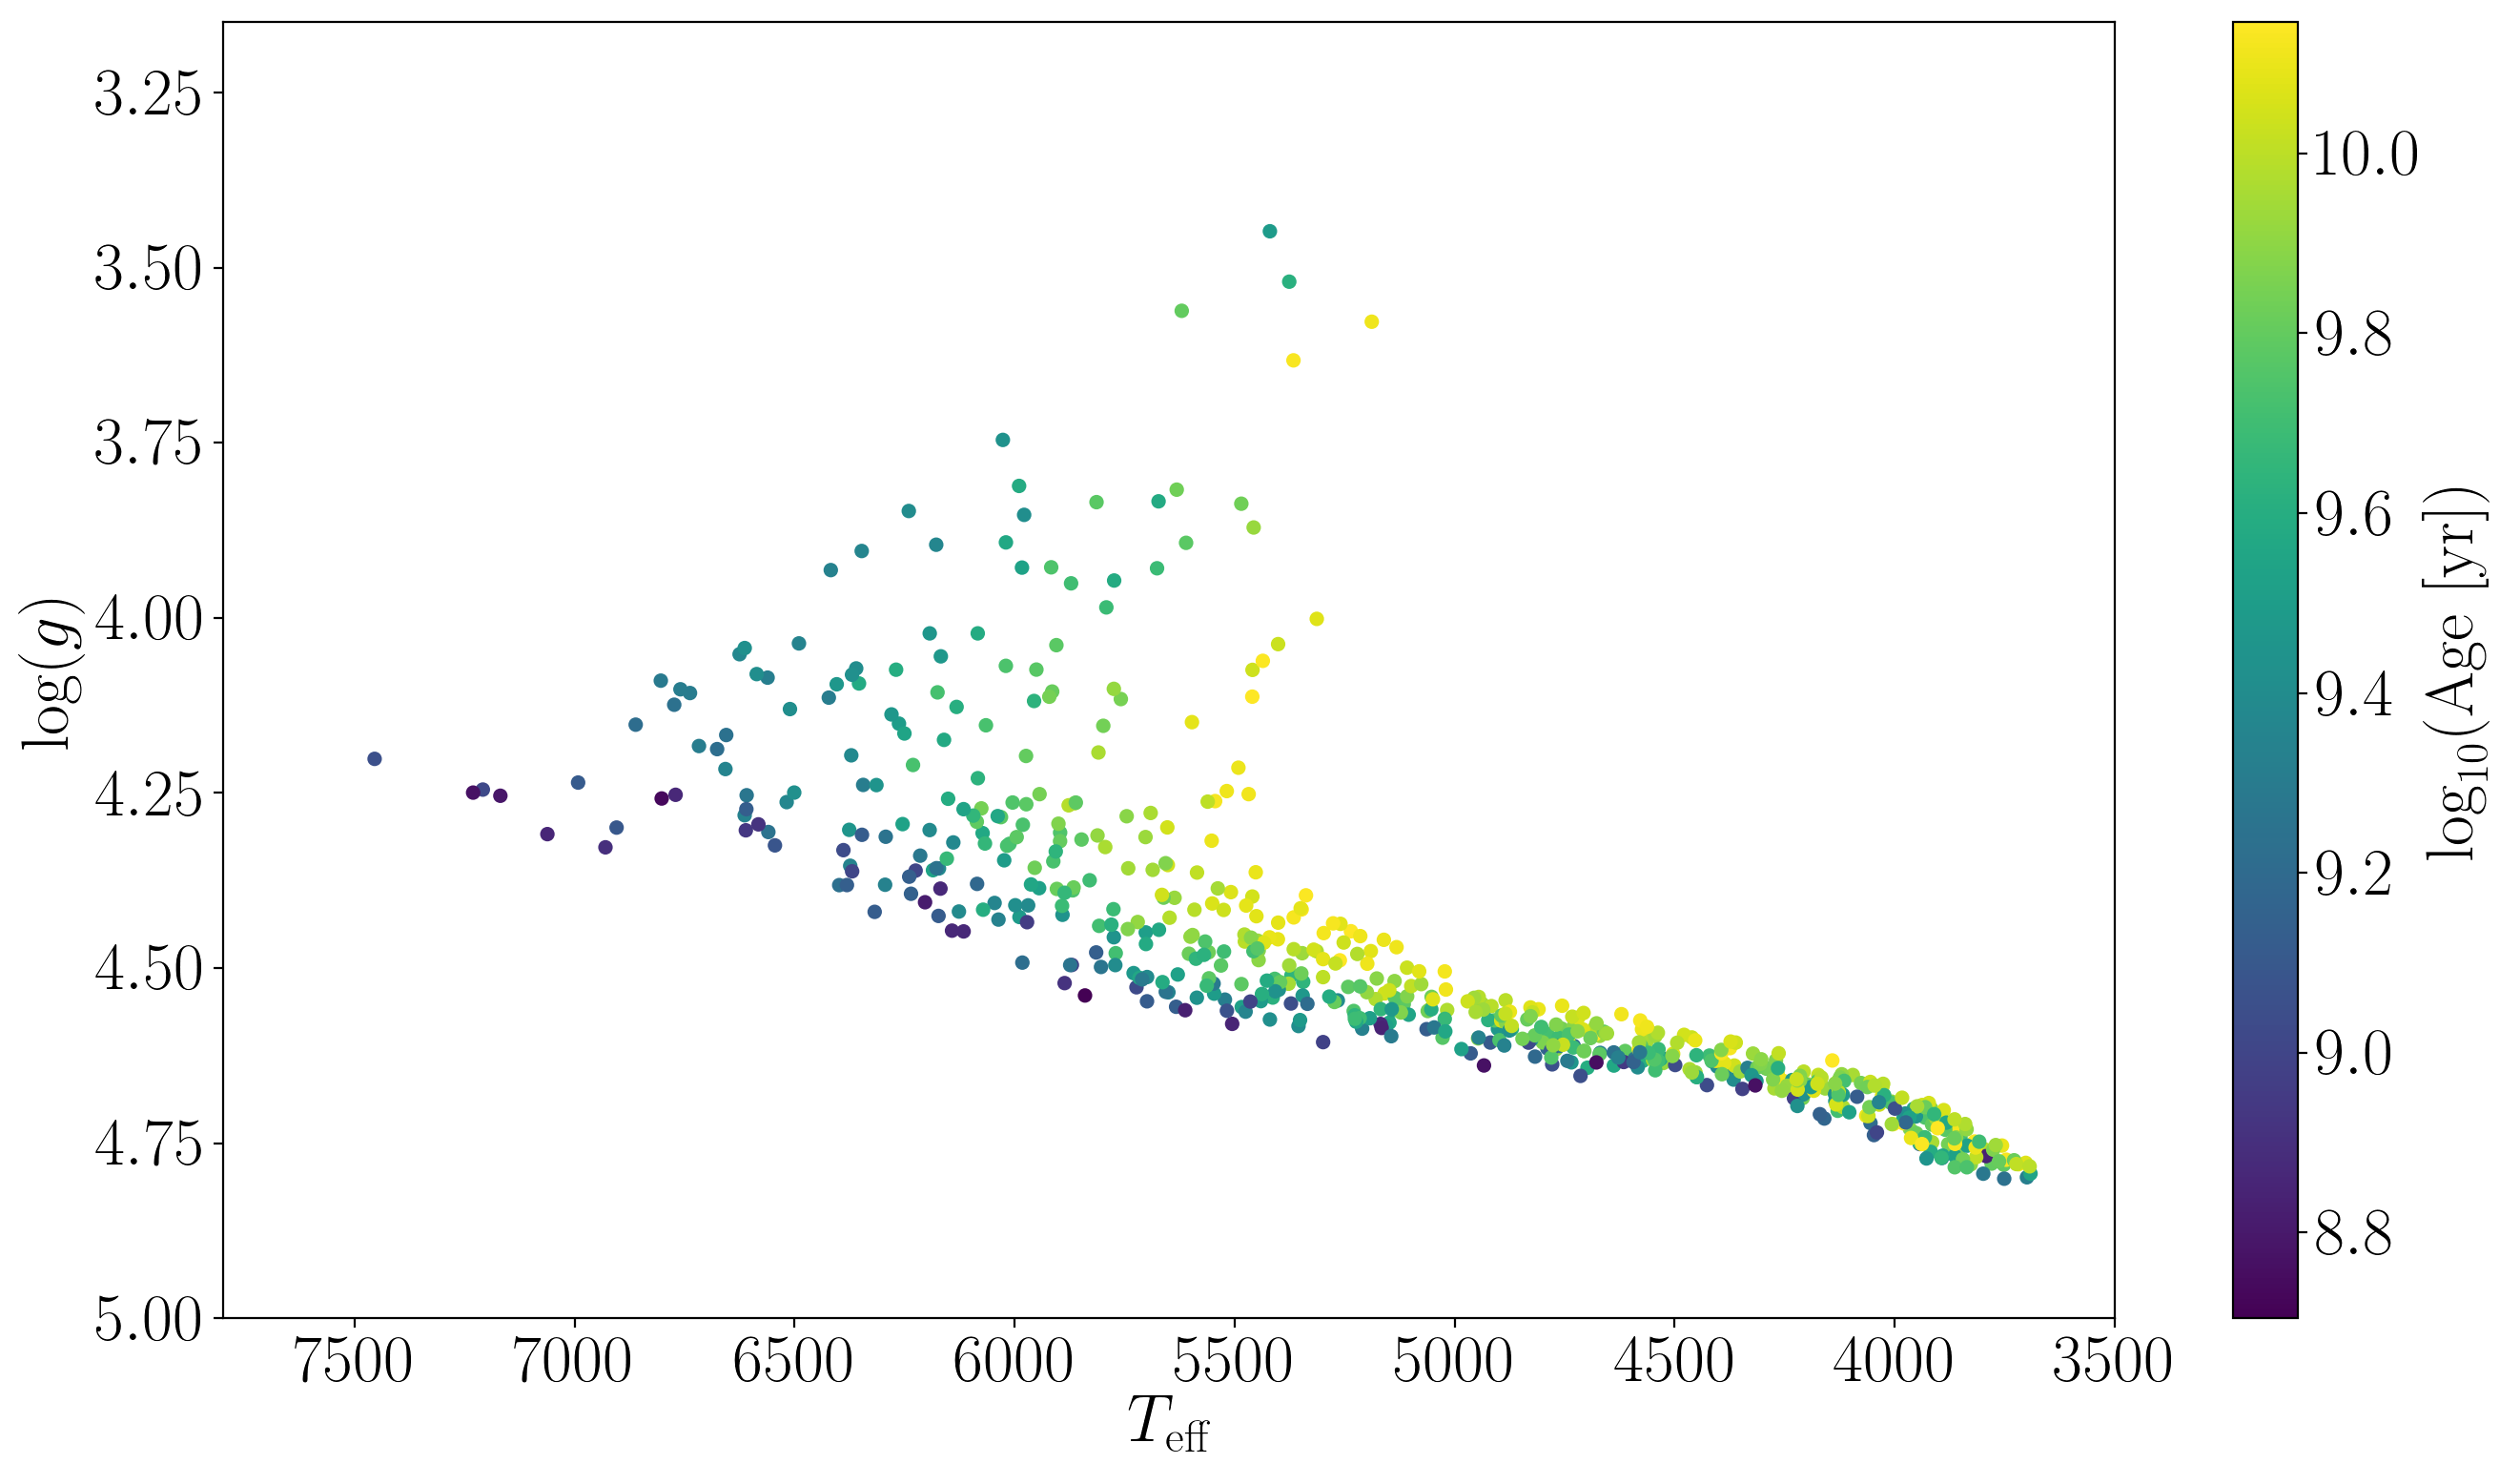

In [161]:
plt.figure(figsize=(16, 9), dpi=200)
plt.scatter(teff, logg, c=age, s=20)
plt.colorbar(label="$\log_{10}(\mathrm{Age~[yr]})$")
plt.xlim(7800, 3500)
plt.ylim(5, 3.15)
plt.xlabel("$T_{\mathrm{eff}}$")
plt.ylabel("$\log(g)$")

Now calculate the rotation periods of these stars from their ages and B-V colours.

In [162]:
def gyro_rot(log_age_yr, bv):
    age_myr = (10**(log_age_yr))*1e-6
    a, b, c, n = [.4, .31, .45, .55]
    return age_myr**n * a * (bv - c)**b

print("Sun's rotation period = ", gyro_rot(np.log10(4.6*1e9), 0.65))

Sun's rotation period =  25.11285548232579


Cut the hot stars and the subgiants.

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


Text(0,0.5,'$\\log(g)$')

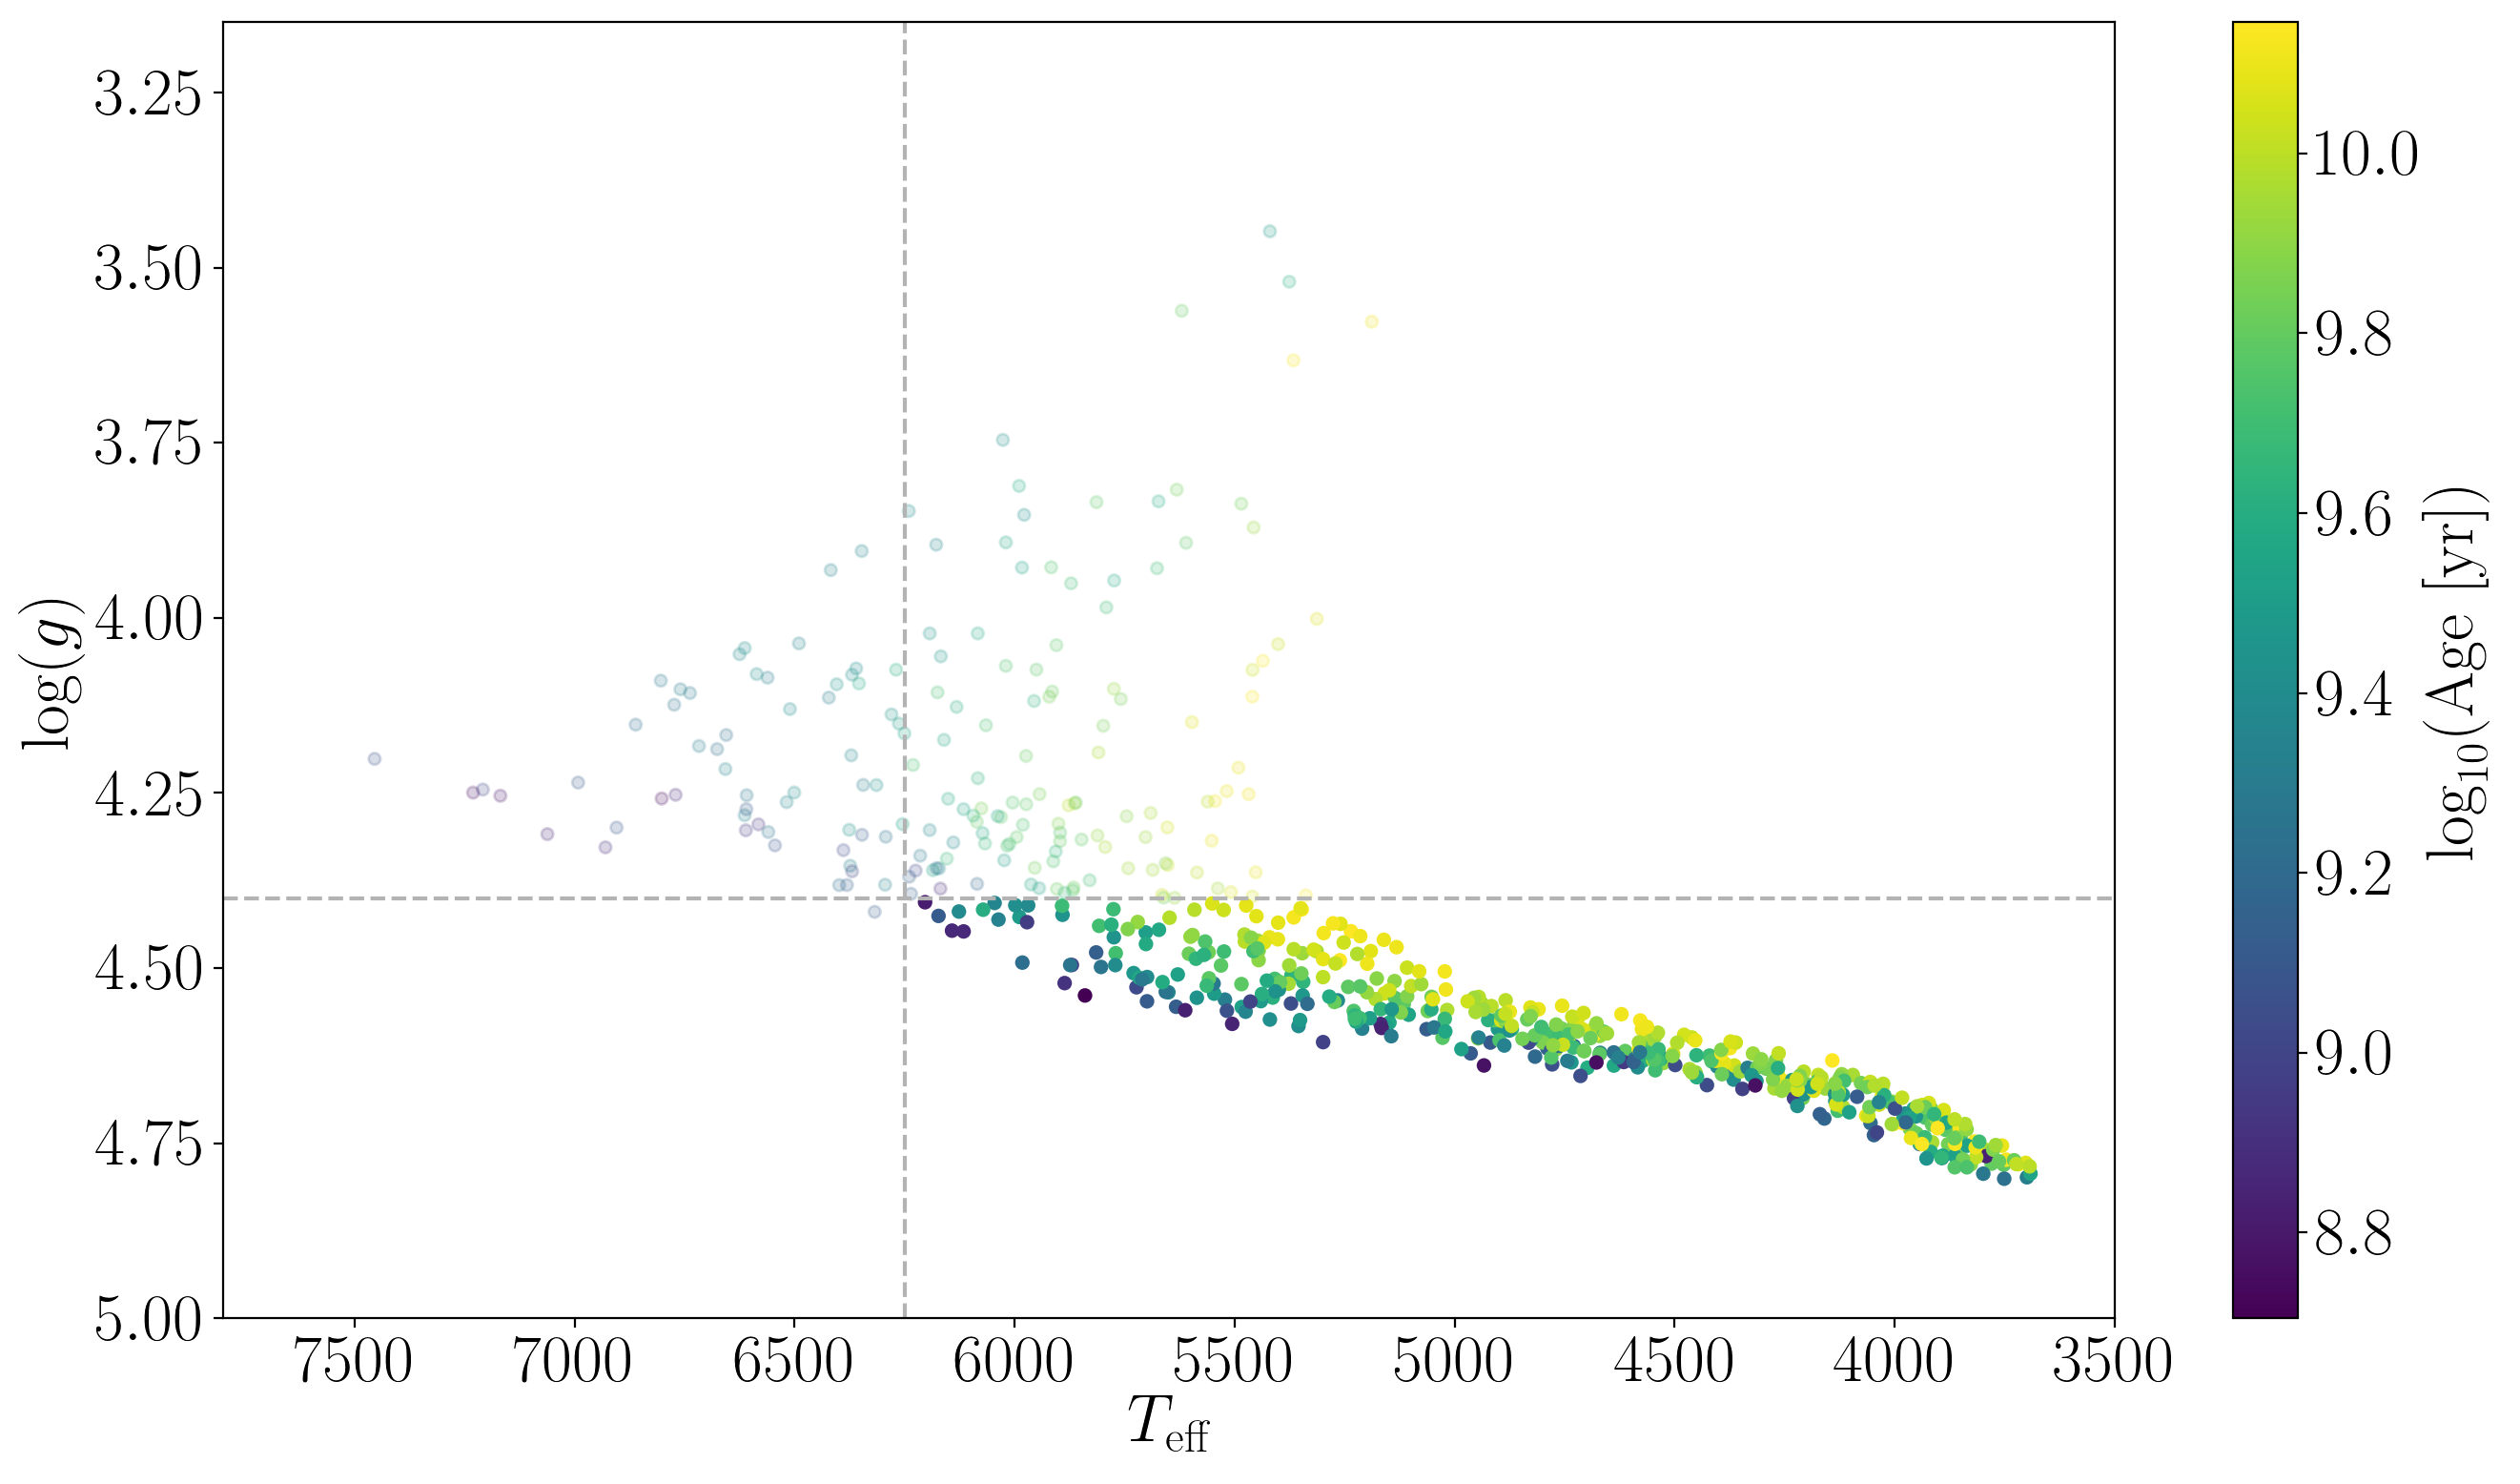

In [163]:
teff_lim, logg_lim = 6250, 4.4
m = teff < teff_lim
m &= logg_lim < logg

plt.figure(figsize=(16, 9), dpi=200)

plt.scatter(teff, logg, c=age, s=20, alpha=.2)
plt.scatter(teff[m], logg[m], c=age[m], s=20)
plt.axvline(teff_lim, ls="--", color=".7")
plt.axhline(logg_lim, ls="--", color=".7")

plt.colorbar(label="$\log_{10}(\mathrm{Age~[yr]})$")
plt.xlim(7800, 3500)
plt.ylim(5, 3.15)
plt.xlabel("$T_{\mathrm{eff}}$")
plt.ylabel("$\log(g)$")

13.08545546649244 12.64632957262703


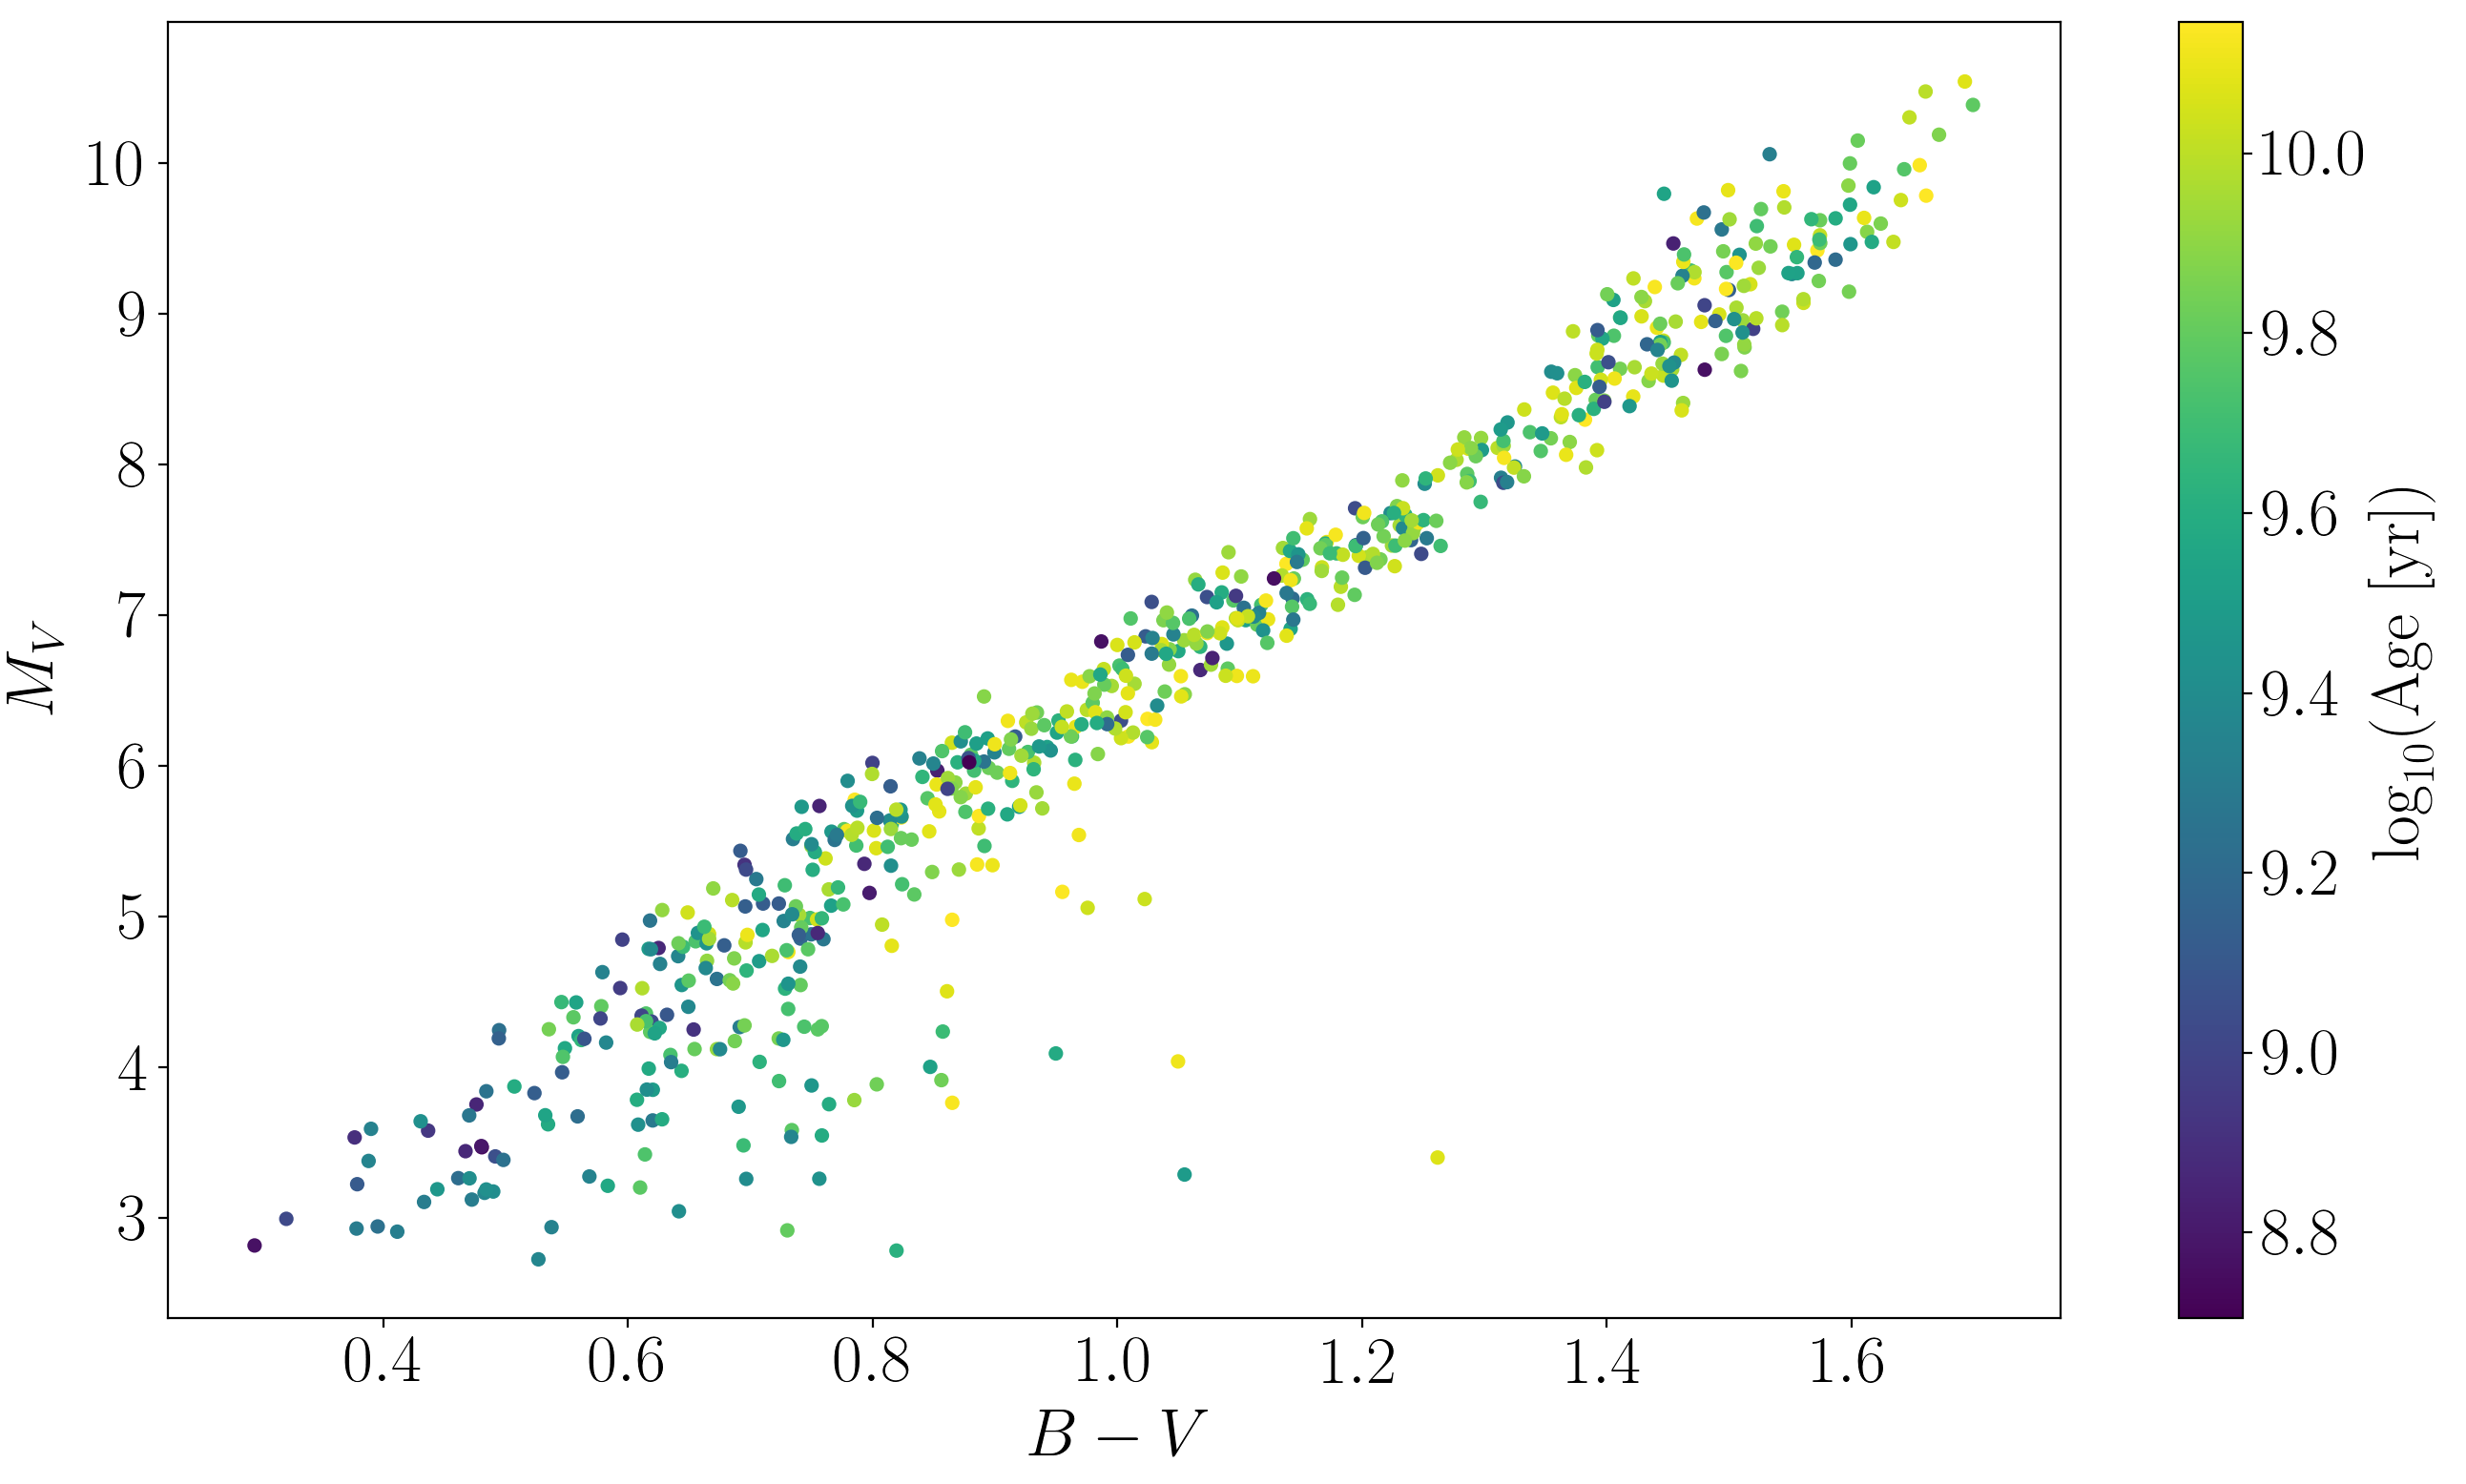

In [168]:
plt.figure(figsize=(16, 9), dpi=200)

def apparent_mag(M, parallax_mas):
    D_pc = 1./(parallax_mas * 1e-3)
    return 5*np.log10(D_pc) - 5 + M

def distance_modulus(m, parallax_mas):
    D_pc = 1./(parallax_mas * 1e-3)
    return m + 5 - 5*np.log10(D_pc)

# b = apparent_mag(B, 1/d_kpc)
# v = apparent_mag(V, 1/d_kpc)
plt.scatter(B-V, distance_modulus(V, 1./d_kpc), c=age, s=20)
plt.colorbar(label="$\log_{10}(\mathrm{Age~[yr]})$")
# plt.xlim(7800, 3500)
#plt.ylim(-3, -14)
plt.ylabel("$M_V$")
plt.xlabel("$B-V$")

print(J[0], K[0])

Text(0.5,0,'$J-K$')

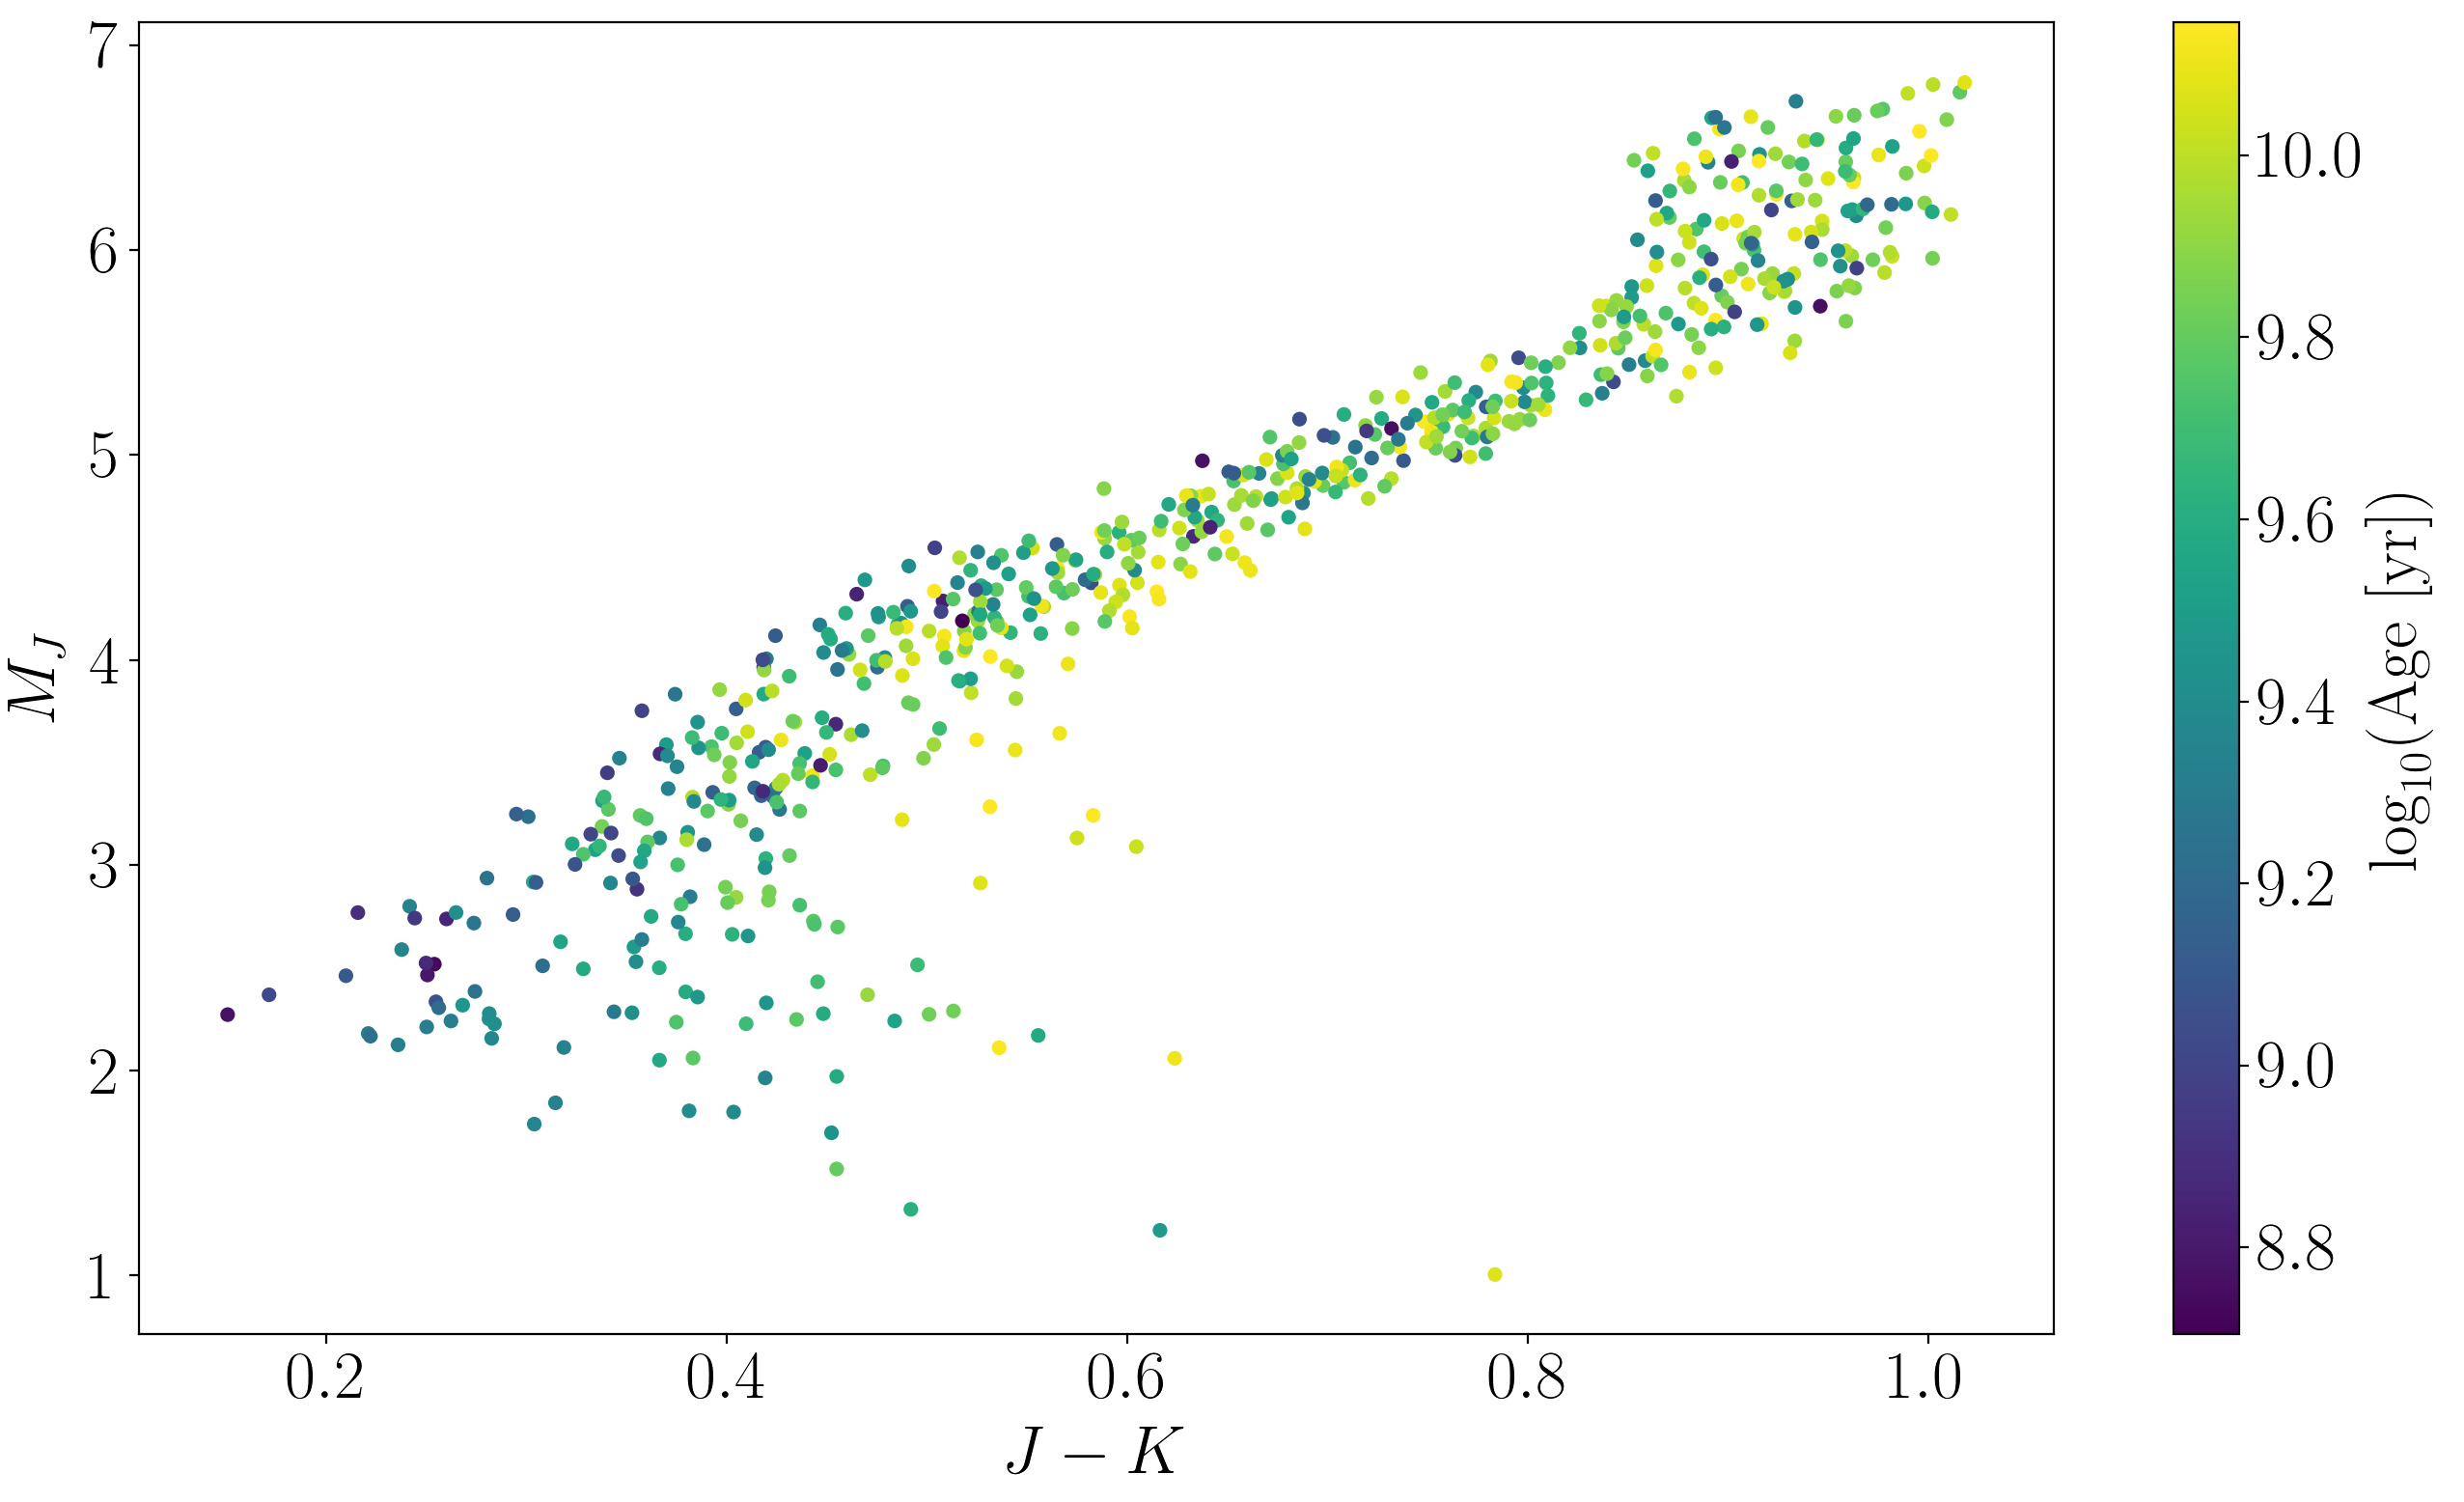

In [169]:
plt.figure(figsize=(16, 9), dpi=200)

plt.scatter(J-K, distance_modulus(J, 1./d_kpc), c=age, s=20)
plt.colorbar(label="$\log_{10}(\mathrm{Age~[yr]})$")
# plt.xlim(7800, 3500)
#plt.ylim(-8, -14)
plt.ylabel("$M_J$")
plt.xlabel("$J-K$")

In [170]:
short_df = df.iloc[m]

short_df["prot"] = gyro_rot(short_df.age, short_df.BV)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Text(0,0.5,'$\\mathrm{Rotation~period~[days]}$')

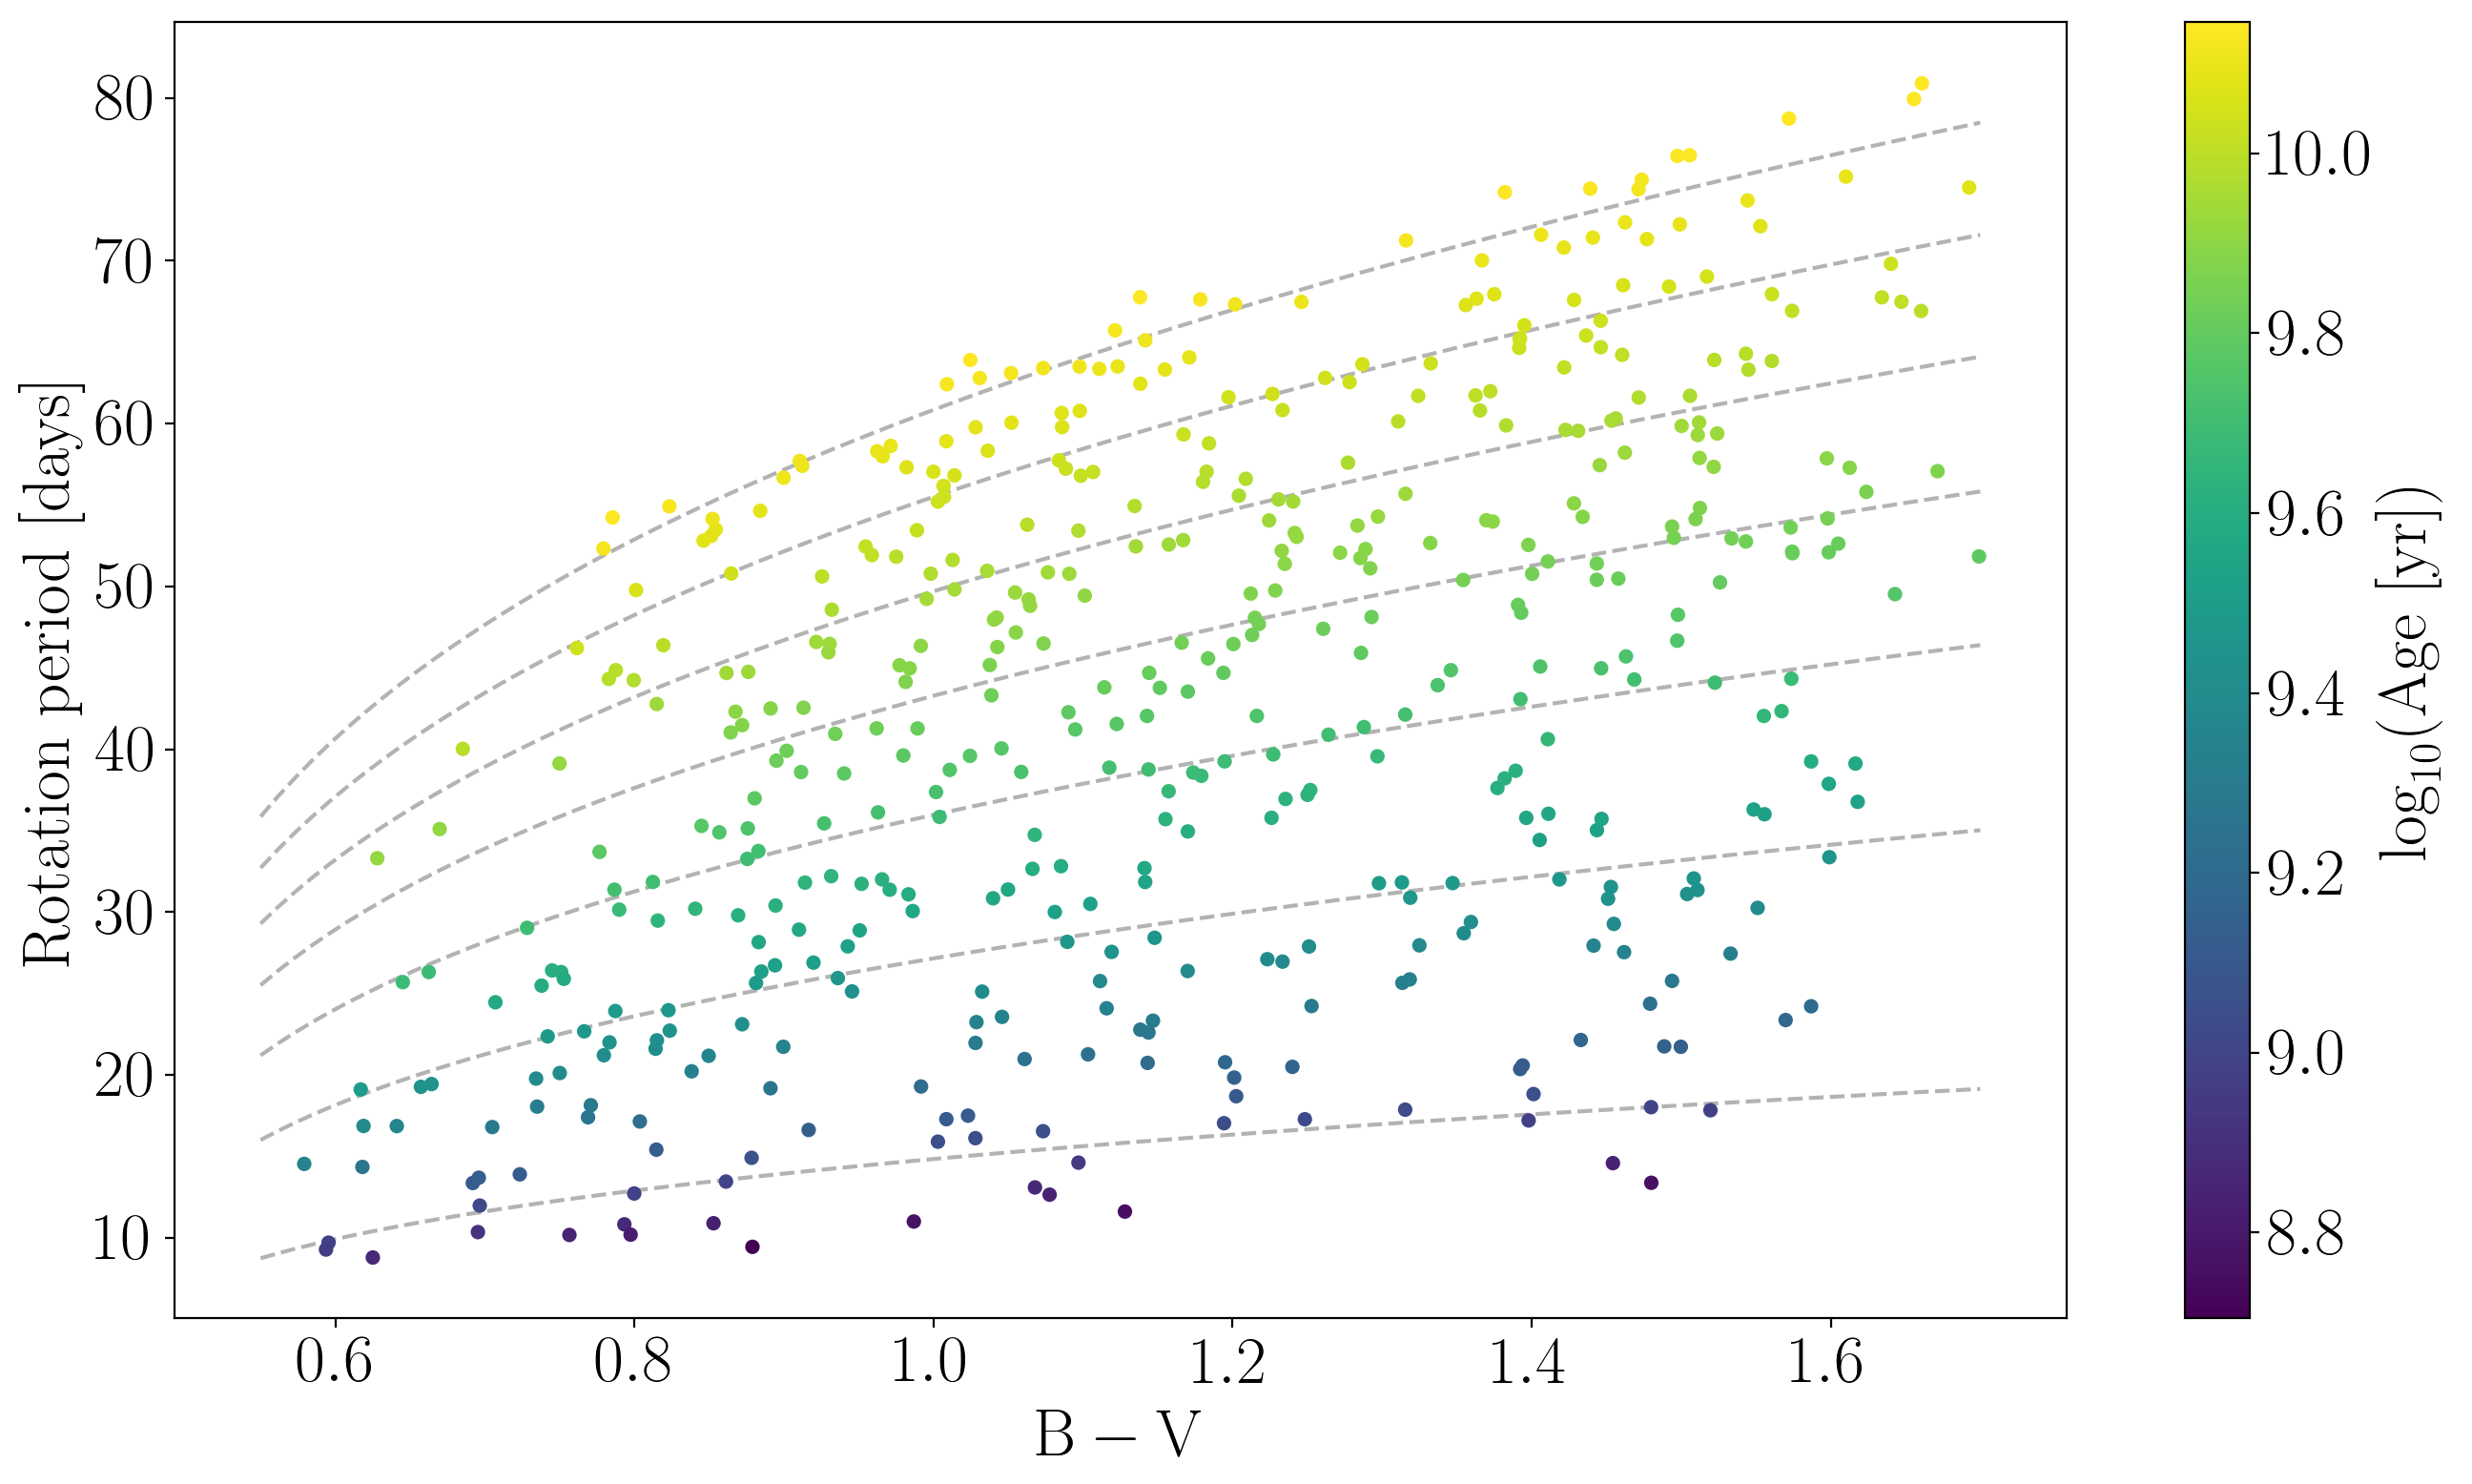

In [171]:
plt.figure(figsize=(16, 9), dpi=200)

# Plot models
xs = np.linspace(.55, 1.7, 100)
for a in range(1, 14, 2):
    plt.plot(xs, gyro_rot(np.log10(a*1e9), xs), color=".7", ls="--", zorder=0)

plt.scatter(short_df.BV, short_df.prot, c=short_df.age, s=20, zorder=1)
plt.colorbar(label="$\log_{10}(\mathrm{Age~[yr]})$")
plt.xlabel("$\mathrm{B-V}$")
plt.ylabel("$\mathrm{Rotation~period~[days]}$")

Save simulated data file.

In [172]:
short_df.to_csv("simulated_data.csv")